# Thompson Sampling

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [4]:
import random  # Import the random library for generating beta distributions
N = 10000  # Total number of rounds (users visiting the ads)
d = 10  # Number of ads
ads_selected = []  # List to store which ad was selected at each round

# Initialize lists to keep track of the number of rewards for each ad
numbers_of_rewards_1 = [0] * d  # Number of times reward 1 (click) was obtained for each ad
numbers_of_rewards_0 = [0] * d  # Number of times reward 0 (no click) was obtained for each ad
total_reward = 0  # Total accumulated reward

# Iterate over all rounds
for n in range(0, N):
    ad = 0  # Initialize the selected ad for the current round
    max_random = 0  # Maximum random beta value observed for this round

    # Loop through all ads to find the ad with the highest beta distribution value
    for i in range(0, d):
        # Generate a random value from a beta distribution using the rewards so far
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta  # Update max_random with the higher beta value
            ad = i  # Select the ad corresponding to the highest beta value

    # Append the selected ad to the list of selected ads
    ads_selected.append(ad)

    # Retrieve the reward (1 or 0) for the selected ad from the dataset
    reward = dataset.values[n, ad]  # Replace `dataset` with your actual dataset variable

    # Update the reward counts for the selected ad
    if reward == 1:
        numbers_of_rewards_1[ad] += 1  # Increment the count of reward 1
    else:
        numbers_of_rewards_0[ad] += 1  # Increment the count of reward 0

    # Update the total reward
    total_reward += reward


## Visualising the results - Histogram

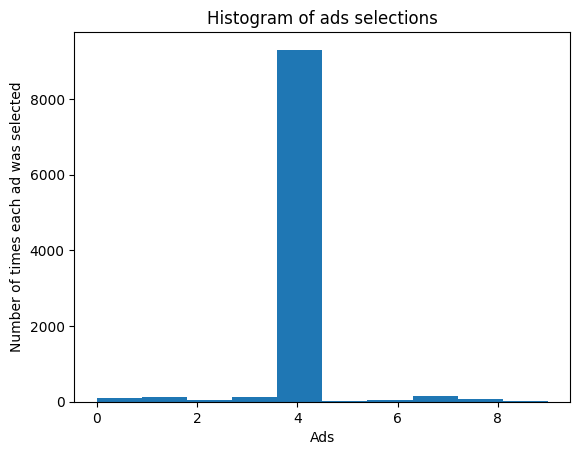

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()